NLP DA: Sentiment Analysis on Non-Spam Messages from a Dataset of Mixed (Spam and Non-Spam) Messages
Aastha Kumar (21BCE5067)

In [4]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from wordcloud import WordCloud


In [5]:
# Step 1: Data Collection & Pre-Processing

# Load the dataset
raw_mail_data = pd.read_csv('/content/mail_data.csv')

# Replace missing/null values with an empty string
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data), '')

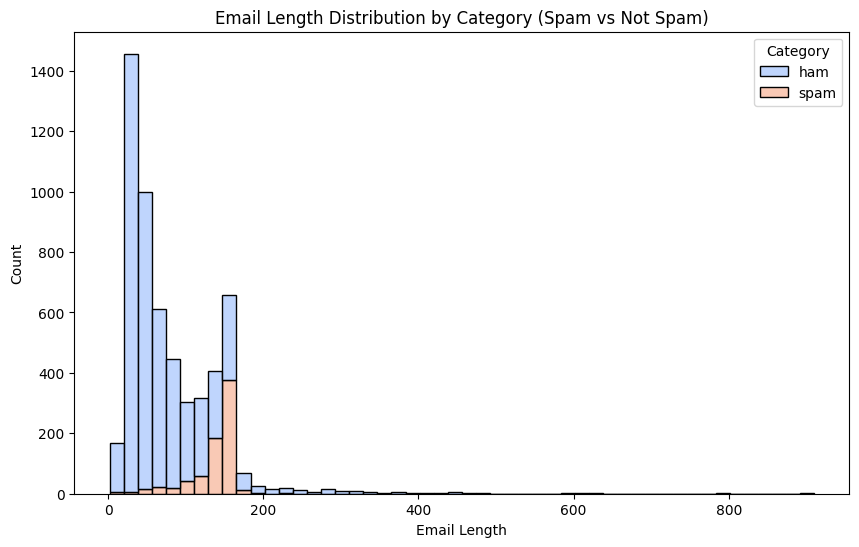

In [6]:
# Step 2: Exploratory Data Analysis (EDA)

# Email Length Distribution
mail_data['Email Length'] = mail_data['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=mail_data, x='Email Length', hue='Category', multiple='stack', bins=50, palette='coolwarm')
plt.title('Email Length Distribution by Category (Spam vs Not Spam)')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()

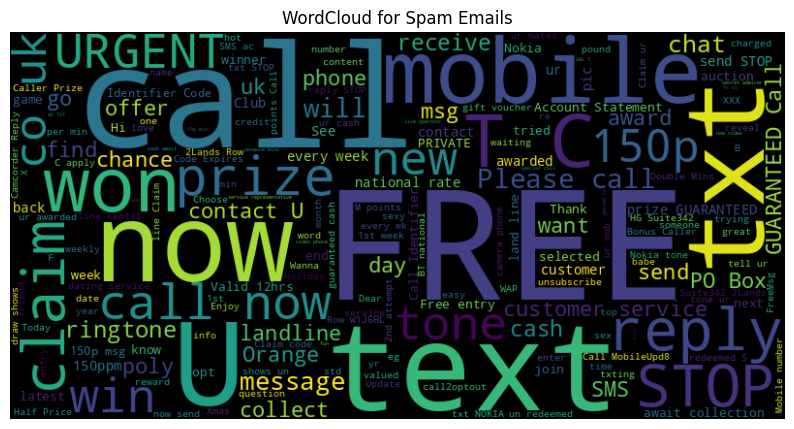

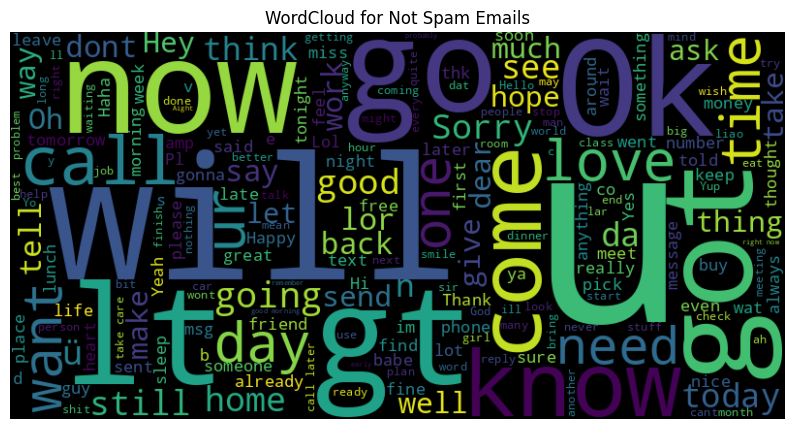

In [7]:
# Step 3: WordCloud Visualization for Spam and Not Spam

# Create separate datasets for spam and not spam
spam_emails = mail_data[mail_data['Category'] == 'spam']['Message']
not_spam_emails = mail_data[mail_data['Category'] == 'ham']['Message']

# Generate WordCloud for spam emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_emails))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Spam Emails")
plt.show()

# Generate WordCloud for not spam emails
not_spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(not_spam_emails))
plt.figure(figsize=(10, 6))
plt.imshow(not_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Not Spam Emails")
plt.show()


In [8]:
# Step 4: Label Encoding

# Convert 'spam' to 0 and 'not spam' to 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1


In [9]:
# Step 5: Separating Features and Labels

# Features: The 'Message' column, containing email text
X = mail_data['Message']

# Labels: The 'Category' column, containing 0 for spam and 1 for not spam
Y = mail_data['Category']


In [10]:
# Step 6: Splitting Data into Training and Test Sets

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [11]:
# Step 7: Feature Extraction using TF-IDF Vectorization

# Initialize TF-IDF Vectorizer to convert text data to feature vectors
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the training and test data into vectors
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test to integers for model training
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [12]:
# Step 8: Model Selection - Training the Logistic Regression Model

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train_features, Y_train)


LogisticRegression(max_iter=200)

In [13]:
# Step 9: Evaluating the Model

# Predict on the test data
test_predictions = model.predict(X_test_features)
test_accuracy = accuracy_score(Y_test, test_predictions)
print("\nAccuracy on test data:", test_accuracy)

# Generate classification report for more detailed evaluation
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, test_predictions, target_names=['Spam', 'Not Spam']))



Accuracy on test data: 0.9668161434977578

Classification Report (Test Data):
              precision    recall  f1-score   support

        Spam       1.00      0.76      0.86       155
    Not Spam       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115




Top 20 features for identifying spam:
     Feature  Importance
4729      ok    1.707369
4014      ll    1.638231
3133      gt    1.587237
4104      lt    1.573321
1837    come    1.411484
3332    home    1.382611
2065      da    1.324883
3053   going    1.254403
3081     got    1.189174
3882   later    1.177197
4060     lor    1.174124
7124     way    1.131180
3065    good    1.089963
4724      oh    1.051545
6091   sorry    1.035126
4557    need    1.017343
2224     did    0.986101
5560   right    0.956169
6589   think    0.950916
7109     wat    0.949250


<ipython-input-14-7f8e80441908>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20), palette='viridis')


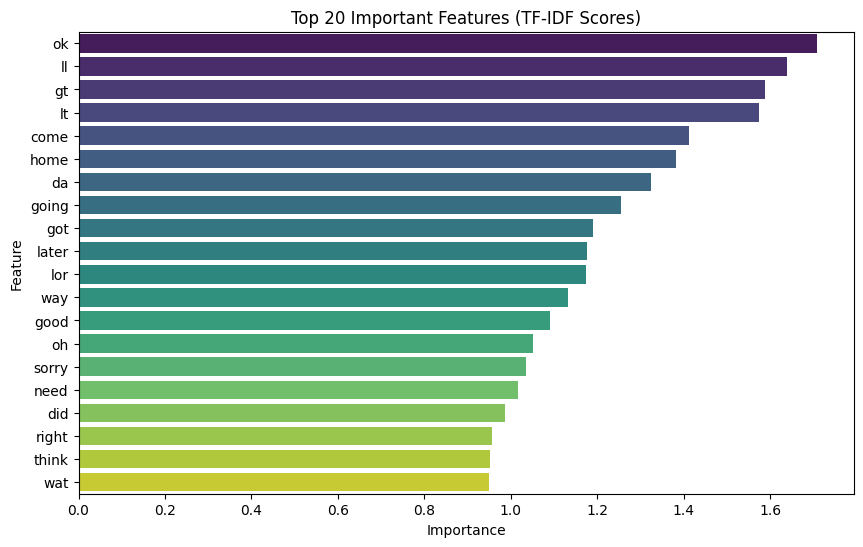

In [14]:
# Step 10: Visualizing Feature Importance (Top TF-IDF Features)

# Get feature names and coefficients
feature_names = feature_extraction.get_feature_names_out()
coefficients = model.coef_[0]

# Create a dataframe of features and their importance (coefficients)
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 20 important features for identifying spam
print("\nTop 20 features for identifying spam:")
print(feature_importance.head(20))

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20), palette='viridis')
plt.title('Top 20 Important Features (TF-IDF Scores)')
plt.show()


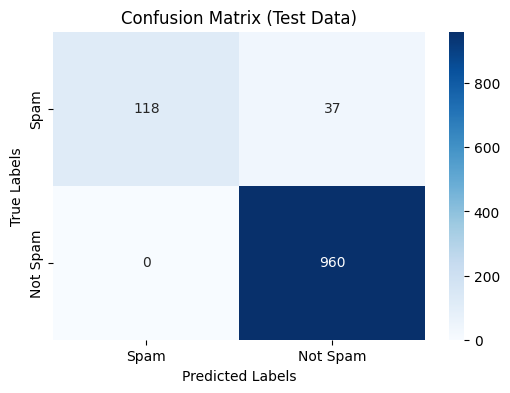

In [15]:
# Step 11: Confusion Matrix and Visualization

# Confusion matrix for test data
conf_matrix = confusion_matrix(Y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Not Spam'], yticklabels=['Spam', 'Not Spam'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [19]:
# Step 15: Prediction Probabilities Table for Samples

# Predict probabilities for a few test emails
sample_emails = X_test[:5]
sample_probabilities = model.predict_proba(X_test_features[:5])

# Create a DataFrame to display predictions and probabilities
prediction_table = pd.DataFrame({
    'Email': sample_emails,
    'Spam Probability': sample_probabilities[:, 0],
    'Not Spam Probability': sample_probabilities[:, 1],
    'Predicted Label': model.predict(X_test_features[:5])
})

print("\nPrediction Probabilities for Sample Emails:")
print(prediction_table)


Prediction Probabilities for Sample Emails:
                                                  Email  Spam Probability  \
2632  URGENT! Your mobile No 077xxx WON a £2,000 Bon...          0.808714   
454   Ok i will tell her to stay out. Yeah its been ...          0.035651   
983   Congrats! 2 mobile 3G Videophones R yours. cal...          0.403326   
1282      Am I the only one who doesn't stalk profiles?          0.065934   
4610                             Y de asking like this.          0.045662   

      Not Spam Probability  Predicted Label  
2632              0.191286                0  
454               0.964349                1  
983               0.596674                1  
1282              0.934066                1  
4610              0.954338                1  
